# 선정리

## 어떤 함수(라이브러리)를 사용해야 기술통계가 가능할까?
- .mean(): 산술평균
- stats.trim_mean(컬럼, 상하위)
- .average(컬럼, 가중치)
- .median(): 중앙값
- .mode(): 최빈값

## 기술통계 핵심 요약 !!! 핵심 포인트 !!!

| 분류 | 통계량 | 쉬운 설명 | 이상치에 흔들리나? |
|------|--------|----------|:----------------:|
| **중심 지표** | 평균 (Mean) | 전부 더해서 개수로 나누기 | 많이 흔들림 |
| *(대표 선수)* | 중앙값 (Median) | 줄 세운 다음 한가운데 값 | 거의 안 흔들림 |
| | 절사평균 (Trimmed Mean) | 양쪽 극단값 빼고 평균 | 조금 흔들림 |
| | 가중평균 (Weighted Mean) | 가중치로 평균을 내기 | 많이 흔들림 |
| **산포도** | 분산 (Variance) | 평균에서 얼마나 떨어져 있나 (제곱) | 많이 흔들림 |
| *(얼마나 퍼져 있나)* | 표준편차 (Std Dev) | 분산에 루트 씌운 것 (원래 단위) | 많이 흔들림 |
| | IQR (Interquartile Range) | 상위 25% 값 - 하위 25% 값 | 거의 안 흔들림 |
| | 변동계수 (CV) | 표준편차 ÷ 평균 (상대적 퍼짐, %) | 많이 흔들림 |
| **분포 모양** | 왜도 (Skewness) | 좌우 대칭인가, 한쪽으로 치우쳤나 | - |
| | 첨도 (Kurtosis) | 꼬리가 두꺼운가, 얇은가 (극단값 빈도) | - |

변동계수, 분포모양은 해당 실습에선 다루지 않음

## 어떤 함수(라이브러리)를 사용해야 기술통계가 가능할까?
- .mean(): 산술평균
- stats.trim_mean(컬럼, 상하위)
- .average(컬럼, 가중치)
- .median(): 중앙값
- .mode(): 최빈값

## 산포도를 확인하는 함수(라이브러리)
- .mean() 평균
- .var() 분산
    - ddof = 분모에서 빼는 값
    - ddof=0 → 모집단
    - ddof=1 → 표본 (기본)
- .std() 표준편차
- 범위 .max() - .min()
- .quantile() 백분위수 설정
    - quantile(0.25) q1
    - quantile(0.5) q2
    - quantile(0.75) q3

## IQR로 이상치 판별하는 법
- IQR = Q3 - Q1 # 가운데 50% 데이터 폭 → Q1 ~ Q3은 데이터가 가장 많이 몰린 구간
    - iqr_lower = Q1 - 1.5 * IQR # IQR을 바깥으로 조금 더 확장한다 → 정상 데이터 허용 범위를 살짝 늘림
    - iqr_upper = Q3 + 1.5 * IQR # IQR을 바깥으로 조금 더 확장한다 → 정상 데이터 허용 범위를 살짝 늘림
    - iqr_outliers = data[(data < iqr_lower) | (data > iqr_upper)] # 정상 데이터 범위 밖의 데이터를 이상치로 확정

## Z-Score로 이상치 판별하는 법
- Z = (값 - 평균) / 표준편차
- z_scores = (data - data.mean()) / data.std()
- z_outliers_2 = data[np.abs(z_scores) > 2] # 평균에서 표준편차 2개 이상 → 의심구간
- z_outliers_3 = data[np.abs(z_scores) > 3]  # 평균에서 표준편차 3개 이상 → 확정구간
    - np.abs(z_scores) 절대값 → 평균보다 매우 크거나 매우 작거나(음수)

# 1회차: 통계적 사고와 기술통계 실습

## 목차

| 순서 | 파트 | 주제 | 핵심 내용 |
|------|------|------|----------|
| 1 | Part 1 | 핵심 정리 | 기술/추론통계 비교, 데이터 유형, 측정 척도, 시각화 가이드 |
| 2 | Part 2 | 데이터 유형 탐색 | Iris·Wine 데이터로 수치형/범주형 구분, dtypes, describe(), value_counts() |
| 4 | Part 4 | 중심 지표 (대표값) | 산술평균, 절사평균, 가중평균, 중앙값, 최빈값 + 이상치 영향 비교 |
| 5 | Part 5 | 산포도 | 편차, 분산, 표준편차, 범위, IQR, 이상치 판별 + 베셀 보정(N-1) |

## Part 1: 핵심 정리

### 1. 기술통계 vs 추론통계

| 구분 | 기술통계 (Descriptive) | 추론통계 (Inferential) |
|------|----------------------|----------------------|
| **뭘 하는 건가?** | 요약/시각화 | 예측 / 검정 |
| **보는 대상** | 현재의 데이터 | 모집단 |
| **쓰는 도구** | 평균, 중앙값, 그래프 등 | 가설검정, 신뢰구간, 회귀분석 등 |
| **예시** | "우리 반 시험 평균은 75점이야" | "이 약이 진짜 효과가 있을까?" |
| **확실한가?** | 확실함 (그냥 숫자 정리) | 불확실함 (확률로 판단) |

- 기술통계: 데이터 자체를 설명한다 <br>
→ 평균, 중앙값, 표준편차, 그래프 등

- 추론통계:표본으로 모집단을 추정한다 <br>
→ 신뢰구간, 가설검정 등

이번 실습은 기술통계 중심이다.

### 2. 데이터 유형(암기추천) & 측정 척도
핵심 기준
- 순서 있는가?
- 간격 같은가?
- 0이 “없음” 의미인가?

데이터 유형(형태)과 측정 척도(성질)는 서로 다른 분류이지만, 아래처럼 주로 짝지어진다.

| 측정 척도 | 주로 해당하는 데이터 유형 | 순서 | 간격 동일 | 0=없음 | 쉬운 설명 | 예시 | 가능한 연산 |
|----------|----------------------|:----:|:--------:|:-----:|----------|------|-----------|
| **비율 척도** | 수치형 (대부분의 수치 데이터) | O | O | O | 0이 진짜 "없음". 비율 계산 가능 | 키, 무게, 나이, 소득, 개수 | + 비율("2배") |
| **등간 척도** | 수치형 (특수한 경우) | O | O | X | 간격은 동일. 하지만 0이 "없음"이 아님 | 온도(0°C≠온도없음), IQ, 연도 | + 평균, 표준편차 |
| **명목 척도** | 범주형 - 명목형 | X | X | X | 순서가 없고 이름만 구분 | 성별, 혈액형, 우편번호 | 빈도, 최빈값 |
| **순서 척도** | 범주형 - 순서형 | O | X | X | 순서는 있지만 간격 의미 없음 | 학점(A>B>C), 만족도(1~5), 등수 | + 중앙값, 순위비교 |


### 3. 데이터 유형별 시각화 가이드 (그래프 정리 및 암기 -가능하다면)

#### 단변량 분석 (단일 변수 시각화)

| 데이터 유형 | 시각화 | 목적 | 용도 | 언제 쓰나? |
|------------|--------|------|------|-----------|
| **수치형 (연속)** | 히스토그램 | 분포 | 분포 형태 확인 (어디에 몰려 있나) | 데이터 분포를 처음 파악할 때 |
| | KDE (밀도그림) | 분포 | 부드러운 분포 곡선 | 여러 그룹의 분포를 겹쳐 비교할 때 |
| | 박스플롯 | 분포 | 5요약(Q1,중앙값,Q3,최소,최대) + 이상치 | 중심·퍼짐·이상치를 한눈에 파악할 때 |
| | 바이올린 도표 | 분포 | 분포 형태 + 요약 통계 | 박스플롯 + 밀도를 동시에 보고 싶을 때 |
| **수치형 (이산)** | 막대그래프 | 비교 | 각 정수 값의 빈도 | 값이 정수인 경우 (평점 1~5, 자녀 수 등) |
| **범주형 (명목)** | 막대그래프 | 비교 | 카테고리별 빈도 비교 | 남/여, 혈액형, 탑승항 등 그룹 크기 비교 |
| | 파이차트 | 구성 | 전체 대비 비율 강조 | 항목이 적고(5개 이하) 비율 강조할 때 |
| | 도넛 차트 | 구성 | 파이차트 변형, 중앙에 정보 표시 | 핵심 수치를 중앙에 강조할 때 |
| | 트리맵 | 구성 | 계층적 비율을 면적으로 표현 | 항목이 많거나 계층 구조가 있을 때 |
| | 와플 차트 | 구성 | 비율을 격자로 직관 표현 | 파이차트 대안, 퍼센트 강조할 때 |
| **범주형 (순서)** | 막대그래프 (순서 유지) | 비교 | 순서 + 빈도 확인 | 학점, 만족도, 등급 등 순서가 있는 범주 |

#### 이변량 분석 (두 변수 조합 시각화)

| 데이터 조합 | 시각화 | 목적 | 용도 | 언제 쓰나? |
|------------|--------|------|------|-----------|
| **수치 × 수치** | 산점도 (Scatter) | 관계 | 두 변수의 관계 확인 | 상관관계, 군집, 이상치 패턴 확인 |
| | 히트맵 (상관행렬) | 관계 | 여러 변수 상관관계 한눈에 | 변수가 많을 때 전체 관계를 색깔로 파악 |
| **수치 × 범주** | 그룹별 박스플롯 | 비교/분포 | 그룹 간 분포 비교 | 남녀별 키, 등급별 요금 등 |
| | 그룹별 바이올린 | 비교/분포 | 그룹 간 분포 + 형태 비교 | 분포 형태까지 세밀하게 비교할 때 |
| | 그룹별 히스토그램 | 비교/분포 | 그룹 분포 겹쳐 비교 | 분포의 겹침/분리 정도 확인 |
| **시간 × 수치** | 선 그래프 (Line) | 비교 | 시간에 따른 변화 추세 | 매출 추이, 기온 변화, 주가 등 |
| | 영역 그래프 (Area) | 비교/구성 | 추세 + 누적 크기 강조 | 카테고리별 매출 누적 추이 |
| | 다중 축 차트 (Multi-Axis) | 비교 | 스케일이 다른 변수를 겹쳐 비교 | 매출(억) vs 고객수(명) 동시 비교 |
| **범주 × 범주** | 누적 막대그래프 | 구성 | 교차 빈도/비율 | 성별×생존, 등급×탑승항 등 |
| | 모자이크 플롯 | 구성 | 교차 비율 (면적) | 두 범주 변수의 관계를 면적으로 표현 |


### 4. 기술통계 핵심 요약 !!! 핵심 포인트 !!!

| 분류 | 통계량 | 쉬운 설명 | 이상치에 흔들리나? |
|------|--------|----------|:----------------:|
| **중심 지표** | 평균 (Mean) | 전부 더해서 개수로 나누기 | 많이 흔들림 |
| *(대표 선수)* | 중앙값 (Median) | 줄 세운 다음 한가운데 값 | 거의 안 흔들림 |
| | 절사평균 (Trimmed Mean) | 양쪽 극단값 빼고 평균 | 조금 흔들림 |
| | 가중평균 (Weighted Mean) | 가중치로 평균을 내기 | 많이 흔들림 |
| **산포도** | 분산 (Variance) | 평균에서 얼마나 떨어져 있나 (제곱) | 많이 흔들림 |
| *(얼마나 퍼져 있나)* | 표준편차 (Std Dev) | 분산에 루트 씌운 것 (원래 단위) | 많이 흔들림 |
| | IQR (Interquartile Range) | 상위 25% 값 - 하위 25% 값 | 거의 안 흔들림 |
| | 변동계수 (CV) | 표준편차 ÷ 평균 (상대적 퍼짐, %) | 많이 흔들림 |
| **분포 모양** | 왜도 (Skewness) | 좌우 대칭인가, 한쪽으로 치우쳤나 | - |
| | 첨도 (Kurtosis) | 꼬리가 두꺼운가, 얇은가 (극단값 빈도) | - |

변동계수, 분포모양은 해당 실습에선 다루지 않음

In [1]:
# 필수 라이브러리 Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_iris, load_wine
import warnings
import platform

warnings.filterwarnings('ignore')

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # Linux
    plt.rcParams['font.family'] = 'NanumGothic'

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 전역 시드 설정 (재현성을 위해)
np.random.seed(42)

---

## Part 2: 데이터 유형 탐색

### sklearn 데이터셋으로 수치형/범주형 데이터 구분해보기

데이터 분석의 첫 단계는 **"내 데이터가 어떤 종류인지"** 파악하는 것이다.

- **수치형**: 숫자로 측정되며, 계산이 가능한 데이터
    - 이산형: 셀 수 있는 값 (고객 수, 클릭 횟수, 결함 개수)
    - 연속형: 측정을 통해 얻는 값 (키, 몸무게, 온도)
- **범주형**: 그룹/카테고리를 나타내는 데이터 (성별, 혈액형, 품종)
    - 명목형: 순서가 없음 (혈액형, 지역, 제품 카테고리)
    - 순서형: 순서는 있지만 간격의 의미는 없음 (만족도 등급, 선호도 순위)
    - 이진형: 두 가지 값만 가짐 (0/1, Yes/No)

순서
1. 데이터 로드
2. 데이터 칼럼 및 타입 확인 (info())
3. 수치형 데이터의 기술 통계를 파악 (.describe())
4. 범주형 데이터의 기술 통계를 파악 (.describe())
5. 범주형 데이터 빈도 확인<br> value_counts(): 빈도표 <br> normalize=True: “비율”로 보여준다.

In [2]:
print("\n" + "="*60)
print("Part 2: 데이터 유형 탐색")
print("="*60)

# (1) Iris(붓꽃) 데이터 로드
# 붓꽃 150송이의 꽃잎/꽃받침 크기를 측정한 데이터
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species_name'] = iris_df['species'].map({
    0: 'setosa', 1: 'versicolor', 2: 'virginica'
})

# (2) 데이터 컬럼 및 타입 확인
print("데이터 컬럼 및 타입 확인")
iris_df.info() # 수치형, 범주형 구분
# display(iris_df.head()) # 샘플 데이터 확인

# (3) 수치형 데이터의 기술 통계를 한눈에 파악하기 위한 함수
print("수치형 데이터의 기술 통계를 파악")
display(iris_df.describe().round(2))
# count : 결측치 제외한 개수
# mean : 평균
# std : 표준편차(얼마나 퍼졌나) -> 클수록 변동폭이 큼
# min : 최소
# 25% : 1사분위(Q1)
# 50% : 중앙값(median)
# 75% : 3사분위(Q3)
# max : 최대

# (4) 범주형 데이터의 기술 통계를 한눈에 파악하기 위한 함수
print("범주형 데이터의 기술 통계를 파악")
display(iris_df.describe(include=['object', 'category']).round(2))
# count : 결측치 제외한 개수
# unique: 서로 다른 값의 개수
# top: 최빈값(가장 많이 나온 값)
# freq: 최빈값의 등장 횟수

# (5) 범주형 데이터 빈도 확인 함수
print("범주형 데이터 빈도 확인")
display(iris_df['species_name'].value_counts())
display(iris_df['species_name'].value_counts(normalize=True).round(2)) # 범주의 비율을 구하고 싶다면


Part 2: 데이터 유형 탐색
데이터 컬럼 및 타입 확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   species_name       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
수치형 데이터의 기술 통계를 파악


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.00,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20,1.00
std,0.83,0.44,1.77,0.76,0.82
min,4.30,2.00,1.00,0.10,0.00
25%,5.10,2.80,1.60,0.30,0.00
50%,5.80,3.00,4.35,1.30,1.00
75%,6.40,3.30,5.10,1.80,2.00
max,7.90,4.40,6.90,2.50,2.00


범주형 데이터의 기술 통계를 파악


,species_name
count,150
unique,3
top,setosa
freq,50


범주형 데이터 빈도 확인


species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

species_name
setosa        0.33
versicolor    0.33
virginica     0.33
Name: proportion, dtype: float64

와인 데이터로 해보기

In [3]:
print("\n" + "="*60)
print("Wine 데이터 유형 탐색")
print("="*60)

# (1) Wine 데이터 로드
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['class'] = wine.target
wine_df['class_name'] = wine_df['class'].map({
    0: 'class_0', 1: 'class_1', 2: 'class_2'
})

# (2) 데이터 칼럼 및 타입 확인 (info())
print("데이터 컬럼 및 타입 확인")
wine_df.info() 
# display(wine_df.head())

# (3) 수치형 데이터의 기술 통계를 파악 (.describe())
print("수치형 데이터의 기술 통계를 파악")
display(wine_df.describe().round(2))

# (4) 범주형 데이터의 기술 통계를 파악 (.describe())
print("범주형 데이터의 기술 통계를 파악")
display(wine_df.describe(include=['object', 'category']).round(2))

# (5) 범주형 데이터 빈도 확인
print("범주형 데이터 빈도 확인")
display(wine_df['class_name'].value_counts())
display(wine_df['class_name'].value_counts(normalize=True).round(2)) # 범주의 비율을 구하고 싶다면


Wine 데이터 유형 탐색
데이터 컬럼 및 타입 확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89,0.94
std,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91,0.78
min,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00,0.00
25%,12.36,1.60,2.21,17.20,88.00,1.74,1.20,0.27,1.25,3.22,0.78,1.94,500.50,0.00
50%,13.05,1.87,2.36,19.50,98.00,2.36,2.13,0.34,1.56,4.69,0.96,2.78,673.50,1.00
75%,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00,2.00
max,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00,2.00


범주형 데이터의 기술 통계를 파악


,class_name
count,178
unique,3
top,class_1
freq,71


범주형 데이터 빈도 확인


class_name
class_1    71
class_0    59
class_2    48
Name: count, dtype: int64

class_name
class_1    0.40
class_0    0.33
class_2    0.27
Name: proportion, dtype: float64

---

## Part 3: 기술통계 - 중심 지표 (대표값)

### "이 데이터를 숫자 하나로 요약하면?" → 평균, 중앙값, 최빈값, 절사평균, 가중평균

데이터를 대표하는 값을 구하는 방법은 여러 가지입니다. 각각 장단점이 있어서, 상황에 맞게 골라 써야 합니다.

#### 대표값 비교

| 대표값  | 장점 | 단점 | 언제 쓰나? |
| ---- | -------------------- | ------------- | ------------------ |
| 산술평균 | 계산 쉽고 직관적, 모든 데이터 반영 | 이상치에 매우 민감    | 대칭 분포, 이상치 거의 없을 때 |
| 절사평균 | 이상치 영향 감소 + 평균 특성 유지 | 절사 비율 기준이 주관적 | 평가 점수, 심사 점수       |
| 가중평균 | 중요도 차이 반영 가능 | 가중치 기준이 주관적 | 학점, 포트폴리오 |
| 중앙값  | 이상치 영향 거의 없음 | 극단값 정보 반영 못함 | 연봉, 집값 등 |
| 최빈값  | 범주형에서 대표값 역할 가능 | 수치형에서는 의미 약함  | 혈액형, 선호도 |

---

산술평균 (Arithmetic Mean)<br>
모든 값을 더해 데이터 개수로 나눈 값, 데이터의 전반적인 수준을 나타낸다.
```
평균 = 전체 합 / 개수
예) 시험 평균 점수
```
- 모든 데이터를 사용
- 이상치 영향 매우 큼

절사 평균 (Trimmed Mean)<br>
정렬 후 양쪽 극단값 일부 제거 후 평균<br>
극단값의 영향을 줄이기 위해 사용한다.
- 평균보다 안정적
- 중앙값보다 정보 많이 사용

ex) 상·하위 5%를 제거한 평균 소득

가중평균 (Weighted Mean)<br>
값마다 중요도를 다르게 적용한 평균<br>
모든 값이 동일한 영향력을 갖지 않을 때 사용한다.
```
가중평균 = (값 × 가중치 합) / 가중치 합
예) 과제 40% + 시험 60%
```
- 중요도 차이 반영 가능

중간값 (Median)<br>
정렬했을 때 가운데 값, 짝수면 가운데 두 값 평균
- 이상치 영향 거의 없음
- 전형적인 값 표현에 강함

ex) 소득 분포의 중심값

최빈값 (Mode)<br>
가장 많이 나온 값
- 범주형 데이터 대표값

ex) 혈액형: A, B, A, O, A → 최빈값 = A

### 평균의 함정
1. 이상치의 영향 <br>
평균 → 실제보다 과대<br>
중앙값 → 현실에 가까움<br>
직원 9명 연봉: 3000 ~ 4000<br>
사장 1명: 5억<br>

2. 분포 형태 숨김 <br>
평균은 동일하지만 실제 분포는 완전히 다름 <br>
A반 = 70 ~ 74 → 고르게 분포<br>
B반 = 40 ~ 108 → 편차 큼<br>

3. 다봉 분포 문제 <br>
남녀 키 혼합 데이터 남녀 키 혼합 데이터 <br>
전체 평균 → 실제 대표값 의미 없음 <br>
해결 <br>
→ 그룹 나눠 분석

### 실전 원칙
1. **히스토그램을 먼저 그려라** → 분포 형태, 이상치, 봉우리 개수 확인
2. **이상치가 있거나 분포가 치우쳐 있으면** → 중앙값(Median)을 함께 제시
3. **평균과 중앙값의 차이가 크면** → 비대칭(왜도)이 크다는 신호
4. **봉우리가 2개 이상이면(다봉 분포)** → 평균·중앙값 모두 무의미! 그룹을 나눠서 각각 분석

### 어떤 함수(라이브러리)를 사용해야 기술통계가 가능할까?
- .mean(): 산술평균
- stats.trim_mean(컬럼, 상하위)
- .average(컬럼, 가중치)
- .median(): 중앙값
- .mode(): 최빈값

In [4]:
# Iris 꽃잎 길이 데이터 사용
petal_length = iris_df['petal length (cm)']
display(petal_length.head(10))

# (1) 산술평균: .mean()
print(f"산술평균:{petal_length.mean():.2f}")

# (2) 절사평균 - 극단값을 잘라낸 평균
# stats.trim_mean(평균 구할거, 상하위 몇 퍼 자를꺼야)
print(f"절삭평균(10%):{stats.trim_mean(petal_length, 0.1):.2f}") # 상하위 10% 제거후 평균
# print(f"절삭평균:{stats.trim_mean(petal_length, 0.2):.2f}") # 상하위 20% 제거후 평균


# (3) 가중평균 - 중요도에 따라 가중치를 다르게 주는 평균
# 각 붓꽃 종별로 가중평균을 구하라
species_mean = (
        iris_df
        .groupby('species_name')['petal length (cm)'] # species_name 기준으로 묶는다
        .mean())        # 그룹별 평균 계산
display(species_mean.round(2))

weights = np.array([50, 30, 20]) # 클래스 별 가중치
weighted_mean = np.average(species_mean, weights=weights)
print(f'가중평균: {weighted_mean:.2f}')

# (4) 중앙값 - 줄 세우고 한가운데 값
# .median()  중앙값
print(f'중앙값: {petal_length.median():.2f}')

# (5) 최빈값 - 가장 많이 나타나는 값
print(f'최빈값: {petal_length.mode().values}')

0    1.4
1    1.4
2    1.3
3    1.5
4    1.4
5    1.7
6    1.4
7    1.5
8    1.4
9    1.5
Name: petal length (cm), dtype: float64

산술평균:3.76
절삭평균(10%):3.76


species_name
setosa        1.46
versicolor    4.26
virginica     5.55
Name: petal length (cm), dtype: float64

가중평균: 3.12
중앙값: 4.35
최빈값: [1.4 1.5]


In [5]:
# 이상치가 평균/중앙값에 미치는 영향 비교

# 직원 9명 연봉 (단위: 만원)
employees = pd.Series([3000, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 4000])

# 사장 포함 (5억 = 50000만원)
with_ceo = pd.concat([employees, pd.Series([50000])], ignore_index=True)

comparison = pd.DataFrame({
    '통계량': ['산술평균', '절사평균(10%)', '중앙값'],
    '직원만 (9명)': [employees.mean(), stats.trim_mean(employees, 0.1), employees.median()],
    '사장 포함(10명)': [with_ceo.mean(), stats.trim_mean(with_ceo, 0.1), with_ceo.median()],
})
display(comparison)

,통계량,직원만 (9명),사장 포함(10명)
0,산술평균,3500.0,8150.0
1,절사평균(10%),3500.0,3562.5
2,중앙값,3500.0,3550.0


산술평균 : 사장이란 이상치 때문에 값이 흔들림 <br>
절사평균, 중앙값: 사장이란 이상치가 존재하더라도 값의 흔들림이 적음


,통계량,값,구분
0,산술평균,3500.0,직원만
1,절사평균(10%),3500.0,직원만
2,중앙값,3500.0,직원만
3,산술평균,8150.0,사장 포함
4,절사평균(10%),3562.5,사장 포함
5,중앙값,3550.0,사장 포함


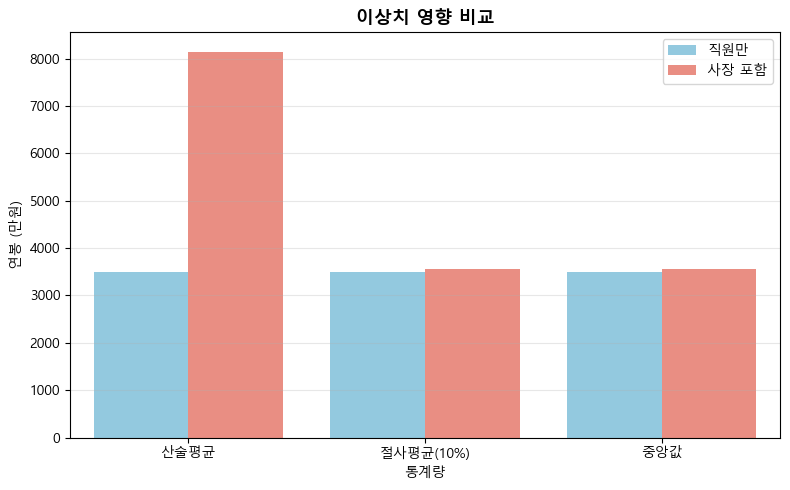

In [6]:
# 비교 막대그래프
fig, ax = plt.subplots(figsize=(8, 5))

compare_df = pd.DataFrame({
    '통계량': ['산술평균', '절사평균(10%)', '중앙값'] * 2,
    '값': [employees.mean(), stats.trim_mean(employees, 0.10), employees.median(),
           with_ceo.mean(), stats.trim_mean(with_ceo, 0.10), with_ceo.median()],
    '구분': ['직원만'] * 3 + ['사장 포함'] * 3
})
display(compare_df) #값 확인

sns.barplot(data=compare_df, x='통계량', y='값', hue='구분', palette=['skyblue', 'salmon'], ax=ax)
ax.set_title('이상치 영향 비교', fontsize=13, fontweight='bold')
ax.set_ylabel('연봉 (만원)')
ax.legend(title='')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

---

## Part 5: 기술통계 - 산포도 (데이터가 얼마나 퍼져 있나?)

### "평균이 같아도 데이터는 다를 수 있다"

산포도는 데이터가 평균 주변에 얼마나 퍼져 있는지를 보여준다.

예를 들어, 시험 평균이 둘 다 70점이라도
- A반: 65 ~ 75 → 값이 비슷 → (산포 작음)  → **모여 있음**
- B반: 30 ~ 100 → 값 다양 → (산포 큼)  → **흩어져 있음**

평균만 보면 A와 B는 같아보이나, 산포도를 확인하면 전혀 다른 데이터이다.

#### 산포도 지표 비교
| 지표        | 의미          | 기준  | 이상치 영향 |
| --------- | ----------- | --- | ------ |
| 분산 / 표준편차 | 평균 기준 퍼짐 정도 | 평균  | 큼      |
| IQR       | 중간 50% 퍼짐   | 중앙값 | 작음     |
| 범위        | 전체 폭        | 없음  | 매우 큼   |

#### 핵심 감각 정리
표준편차 크다 → 데이터 들쭉날쭉 <br>
IQR 작다 → 데이터 가운데 몰림 <br>
범위 크다 → 극단값 있을 가능성 <br>

#### 수식 정리
- **편차**: $d_i = x_i - \bar{x}$
- **모분산**: $\sigma^2 = \frac{1}{N}\sum_{i=1}^{N}(x_i - \bar{x})^2$
- **표본분산**: $s^2 = \frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})^2$ (베셀 보정)
- **표준편차**: $\sigma = \sqrt{\sigma^2}$ (모집단), $s = \sqrt{s^2}$ (표본)
- **범위**: $R = x_{max} - x_{min}$
- **IQR**: $IQR = Q_3 - Q_1$

##### 편차 (Deviation)
각 값이 평균에서 얼마나 떨어졌는지
```
편차 = 각 값 - 평균
```
- 평균보다 크면 양수
- 평균보다 작으면 음수
- 그대로 합하면 +, −가 서로 상쇄된다

##### 분산 (Variance)
- 편차의 상쇄 문제를 해결하기 위해 편차를 제곱해서 평균낸 값이다.
```
분산 = (편차^2들의 평균)
```
- 값이 클수록 데이터가 넓게 퍼져 있다
- 단위가 제곱이라 해석이 직관적이지 않다

> 제곱: + / − 상쇄를 막기 위해

##### 표준편차 (Standard Deviation)
- 분산에 제곱근을 취한 값, 사람이 해석하기 쉽게 만든 변이 지표다.
```
표준편차 = √분산
```
- 원래 데이터와 같은 단위를 가진다
- "보통 평균에서 이 정도 벗어난다"로 해석한다

> 루트: 단위를 되돌려 직관적으로 해석하기 위해

##### 범위
최댓값 - 최솟값
```
범위 = 최대값 - 최소값
```
- 이상치 영향 매우 큼

##### 사분위범위 (Interquartile Range, IQR)
정렬된 데이터에서 25% 지점(Q1)과 75% 지점(Q3) 사이의 거리
```
IQR = Q3 − Q1
```
- 가운데 50% 데이터의 퍼짐 정도를 나타낸다
- 극단값의 영향을 거의 받지 않는다

#### 핵심정리
- 산포 = 데이터 퍼짐 정도
- 기본 = 표준편차
- 이상치 많음 = IQR
- 범위 = 참고용
- 이상치 탐지 = IQR 먼저

#### 이상치 탐지 방법
**1. IQR 방법**: $\quad x < Q_1 - 1.5 \cdot IQR \quad \text{or} \quad x > Q_3 + 1.5 \cdot IQR$ <BR>
**2. Z-score 방법**: $\quad |z| = \left|\frac{x - \bar{x}}{s}\right| > k \quad (k = 2 \sim 3)$

> IQR 방법은 중앙값 기반이라 비대칭 분포에 강건하고, Z-score는 정규분포 가정 시 적합합니다.

##### IQR 방식
이상치 기준
```
Q1 - 1.5 × IQR
~
Q3 + 1.5 × IQR
```
해당 범위를 벗어나면 이상치

##### Z-score 방식
이상치 기준
```
Z = (값 - 평균) / 표준편차
```
|Z| > 2 → 의심<br>
|Z| > 3 → 이상치<br>

- 데이터가 비대칭적인 분포일때는 IQR가 유리
- 대칭적 분포일 때는 z-score가 유리

와인으로 알아보는 산포도

##### 산포도를 확인하는 함수(라이브러리)
- .mean() 평균
- .var() 분산
    - ddof = 분모에서 빼는 값
    - ddof=0 → 모집단
    - ddof=1 → 표본 (기본)
- .std() 표준편차
- 범위 .max() - .min()
- .quantile() 백분위수 설정
    - quantile(0.25) q1
    - quantile(0.5) q2
    - quantile(0.75) q3

IQR로 이상치 판별하는 법
- IQR = Q3 - Q1 # 가운데 50% 데이터 폭 → Q1 ~ Q3은 데이터가 가장 많이 몰린 구간
    - iqr_lower = Q1 - 1.5 * IQR # IQR을 바깥으로 조금 더 확장한다 → 정상 데이터 허용 범위를 살짝 늘림
    - iqr_upper = Q3 + 1.5 * IQR # IQR을 바깥으로 조금 더 확장한다 → 정상 데이터 허용 범위를 살짝 늘림
    - iqr_outliers = data[(data < iqr_lower) | (data > iqr_upper)] # 정상 데이터 범위 밖의 데이터를 이상치로 확정

Z-Score로 이상치 판별하는 법
- Z = (값 - 평균) / 표준편차
- z_scores = (data - data.mean()) / data.std()
- z_outliers_2 = data[np.abs(z_scores) > 2] # 평균에서 표준편차 2개 이상 → 의심구간
- z_outliers_3 = data[np.abs(z_scores) > 3]  # 평균에서 표준편차 3개 이상 → 확정구간
    - np.abs(z_scores) 절대값 → 평균보다 매우 크거나 매우 작거나(음수)

In [7]:
print("\n" + "="*60)
print("Part 5: 기술통계 - 산포도")
print("="*60)

# Wine 알코올 도수 사용
data = wine_df['alcohol']
display(data.head())

# (1) 편차 - 각 값이 평균에서 얼마나 떨어져 있는가
deviations = data - data.mean()
print("편차 : ")
display(deviations.head())

# (2) 분산 - 편차 제곱의 평균
# 데이터의 개수가 많아지면 모집단과 표본집단의 값은 비슷해진다.
print(f"분산 (모집단): {data.var(ddof=0):.4f}")
print(f"분산 (표본집단): {data.var(ddof=1):.4f}")
# 분산


# (3) 표준편차 - 분산에 루트를 씌워서 원래 단위로 되돌림
print(f"표준편차 (모집단): {data.std(ddof=0):.4f}")
print(f"표준편차 (표본집단): {data.std(ddof=1):.4f}")
# 표준편차

# (4) 범위 - 가장 단순한 산포 지표
print(f"범위(max-min): {data.max() - data.min():.4f}")


# (5) 백분위수와 IQR
Q1 = data.quantile(0.25)
Q2 = data.quantile(0.5)
Q3 = data.quantile(0.75)
print(f"Q1: {Q1}") 
print(f"Q2: {Q2}") 
print(f"Q3: {Q3}") 
print(f"IQR: {Q3 - Q1:.4f}") 
# .quantile()백분위수

# (6) 이상치 판별
# 6-1) IQR 기반 이상치 판별 방법
IQR = Q3 - Q1
iqr_lower = Q1 - 1.5 * IQR
iqr_upper = Q3 + 1.5 * IQR
iqr_outliers = data[(data < iqr_lower) | (data > iqr_upper)]
print('IQR 이상치:')
print('IQR 이상치 개수:', len(iqr_outliers))
display(iqr_outliers.head())

# 6-2) Z-Score 방법
z_scores = (data - data.mean()) / data.std()
z_outliers_2 = data[np.abs(z_scores) > 2]
z_outliers_3 = data[np.abs(z_scores) > 3]
print('Z-score 이상치:')
print('|Z-score| > 2 이상치 개수:', len(z_outliers_2))
print('|Z-score| > 3 이상치 개수:', len(z_outliers_3))

# (7) 클래스별 산포도 비교
class_stats = (
    wine_df
    .groupby('class_name')['alcohol']
    .agg([
        ('평균', 'mean'),
        ('분산', 'var'),
        ('표준편차', 'std'),
        ('최소', 'min'),
        ('Q1', lambda x: x.quantile(0.25)),
        ('Q2', lambda x: x.quantile(0.5)),
        ('Q3', lambda x: x.quantile(0.75)),
        ('최대', 'max'),
        ('범위', lambda x: x.max() - x.min()),
        ('IQR', lambda x: x.quantile(0.75) - x.quantile(0.25)),
]))
display(class_stats)


Part 5: 기술통계 - 산포도


0    14.23
1    13.20
2    13.16
3    14.37
4    13.24
Name: alcohol, dtype: float64

편차 : 


0    1.229382
1    0.199382
2    0.159382
3    1.369382
4    0.239382
Name: alcohol, dtype: float64

분산 (모집단): 0.6554
분산 (표본집단): 0.6591
표준편차 (모집단): 0.8095
표준편차 (표본집단): 0.8118
범위(max-min): 3.8000
Q1: 12.362499999999999
Q2: 13.05
Q3: 13.6775
IQR: 1.3150
IQR 이상치:
IQR 이상치 개수: 0


Series([], Name: alcohol, dtype: float64)

Z-score 이상치:
|Z-score| > 2 이상치 개수: 3
|Z-score| > 3 이상치 개수: 0


,평균,분산,표준편차,최소,Q1,Q2,Q3,최대,범위,IQR
class_name,,,,,,,,,,
class_0,13.744746,0.213560,0.462125,12.85,13.400,13.750,14.100,14.83,1.98,0.7
class_1,12.278732,0.289406,0.537964,11.03,11.915,12.290,12.515,13.86,2.83,0.6
class_2,13.153750,0.281156,0.530241,12.20,12.805,13.165,13.505,14.34,2.14,0.7


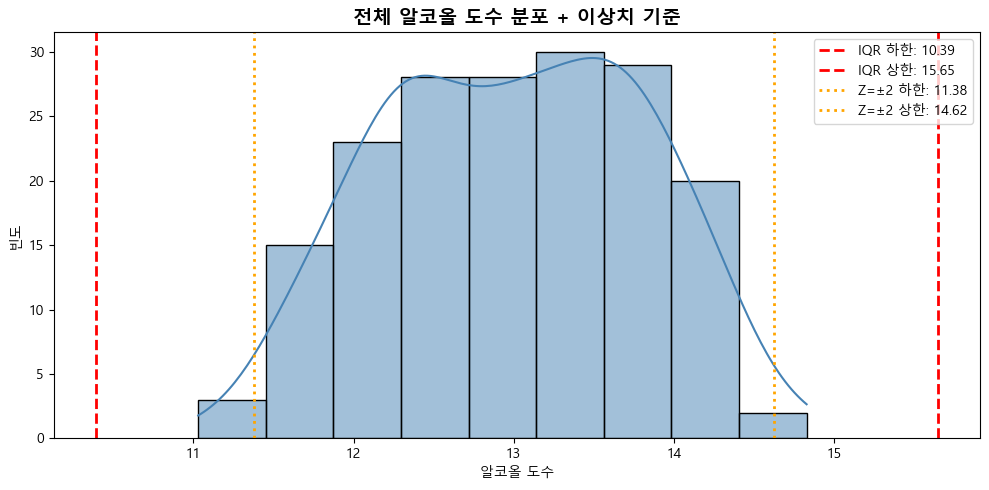

In [8]:
# 전체 알코올 도수 분포 + 이상치 기준선
fig, ax = plt.subplots(figsize=(10, 5))

data = wine_df['alcohol']

# 히스토그램
sns.histplot(data=wine_df, x='alcohol', kde=True, color='steelblue', ax=ax)

# IQR 이상치 기준
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
iqr_lower = Q1 - 1.5 * IQR
iqr_upper = Q3 + 1.5 * IQR

# Z-score 이상치 기준 (|Z| > 2)
z_lower = data.mean() - 2 * data.std()
z_upper = data.mean() + 2 * data.std()

# 기준선 표시
ax.axvline(iqr_lower, color='red', linestyle='--', linewidth=2, label=f'IQR 하한: {iqr_lower:.2f}')
ax.axvline(iqr_upper, color='red', linestyle='--', linewidth=2, label=f'IQR 상한: {iqr_upper:.2f}')
ax.axvline(z_lower, color='orange', linestyle=':', linewidth=2, label=f'Z=±2 하한: {z_lower:.2f}')
ax.axvline(z_upper, color='orange', linestyle=':', linewidth=2, label=f'Z=±2 상한: {z_upper:.2f}')

ax.set_title('전체 알코올 도수 분포 + 이상치 기준', fontsize=14, fontweight='bold')
ax.set_xlabel('알코올 도수')
ax.set_ylabel('빈도')
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()